In [1]:
from PIL import Image
import pywt

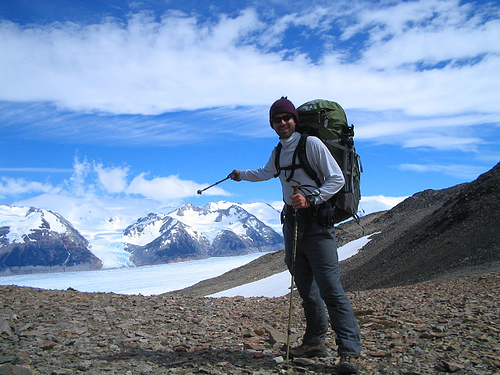

In [3]:
img = Image.open("img.jpg")
img

In [4]:
import pywt
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

In [6]:
image

array([[ 74,  71,  70, ...,  86,  86,  86],
       [ 72,  72,  74, ...,  92,  91,  89],
       [ 73,  74,  75, ...,  94,  89,  89],
       ...,
       [ 80,  76,  82, ...,  89,  84,  90],
       [ 85,  81,  81, ..., 122, 110,  68],
       [ 34,  43,  50, ..., 134, 140, 128]], dtype=uint8)

In [7]:
coeffs_haar = pywt.dwt2(image, 'haar')

In [9]:
coeffs_haar

(array([[144.5, 144.5, 145.5, ..., 191. , 180. , 176. ],
        [149. , 151.5, 148. , ..., 214.5, 195. , 178.5],
        [152. , 156.5, 155. , ..., 189. , 193. , 200. ],
        ...,
        [137.5, 147. , 152. , ...,  66. , 136.5, 184. ],
        [161. , 157.5, 142.5, ..., 153.5, 211.5, 176. ],
        [ 77. , 107. , 139. , ..., 235. , 250. , 268. ]]),
 (array([[  0.5,  -4.5,  -2.5, ..., -15. ,  -5. ,  -4. ],
         [ -2. ,  -0.5,   0. , ...,   3.5,   1. ,  -0.5],
         [  0. ,   0.5,  -1. , ...,   0. ,  -4. ,  -3. ],
         ...,
         [ -4.5,  -8. ,  -2. , ...,  15. ,  14.5, -23. ],
         [ -5. ,  -0.5,  -1.5, ..., -56.5, -38.5,  -2. ],
         [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]]),
  array([[  1.5,  -0.5,  -0.5, ...,   1. ,   2. ,   1. ],
         [  0. ,  -0.5,   0. , ...,   7.5,   7. ,  -0.5],
         [  0. ,  -1.5,   0. , ...,  -3. ,  -7. ,   3. ],
         ...,
         [ -4.5, -11. ,   2. , ..., -14. ,  -9.5, -19. ],
         [  4. ,   5.5,   3.5, ..

In [10]:
LL_H, (LH_H, HL_H, HH_H) = coeffs_haar

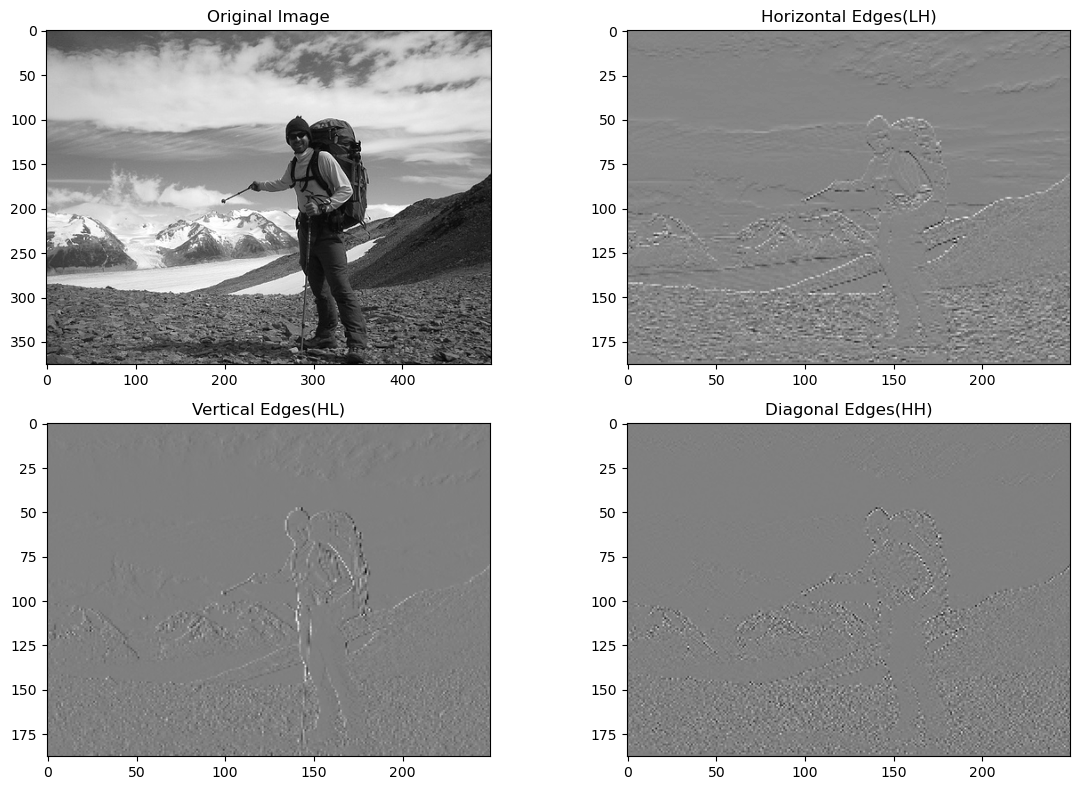

In [11]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(LH_H,cmap='gray')
plt.title('Horizontal Edges(LH)')

plt.subplot(2,2,3)
plt.imshow(HL_H,cmap='gray')
plt.title('Vertical Edges(HL)')

plt.subplot(2,2,4)
plt.imshow(HH_H,cmap='gray')
plt.title('Diagonal Edges(HH)')

plt.tight_layout()

(30, 375, 500)


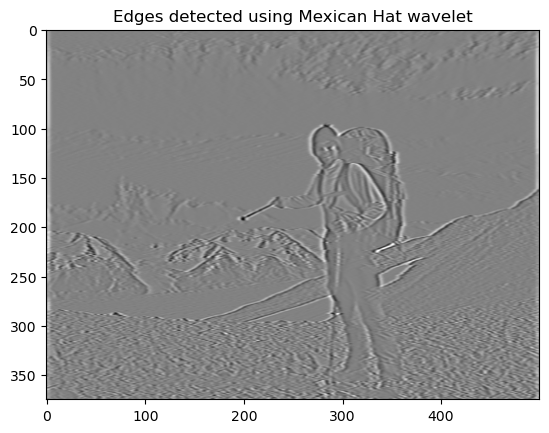

In [13]:
widths = np.arange(1,31)
cwt_matr, freqs = pywt.cwt(image,widths,'mexh')
print(cwt_matr.shape)

plt.imshow(cwt_matr[1], cmap='gray')
plt.title('Edges detected using Mexican Hat wavelet')
plt.show()

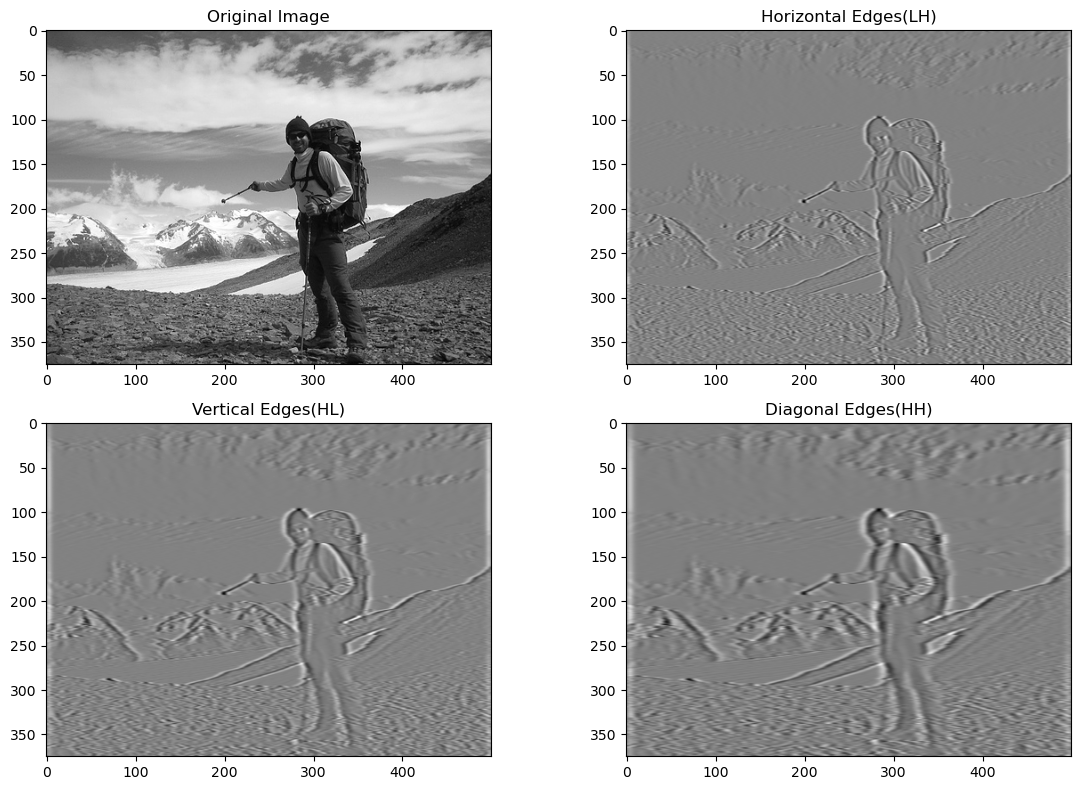

In [14]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(cwt_matr[1],cmap='gray')
plt.title('Horizontal Edges(LH)')

plt.subplot(2,2,3)
plt.imshow(cwt_matr[2],cmap='gray')
plt.title('Vertical Edges(HL)')

plt.subplot(2,2,4)
plt.imshow(cwt_matr[3],cmap='gray')
plt.title('Diagonal Edges(HH)')

plt.tight_layout()

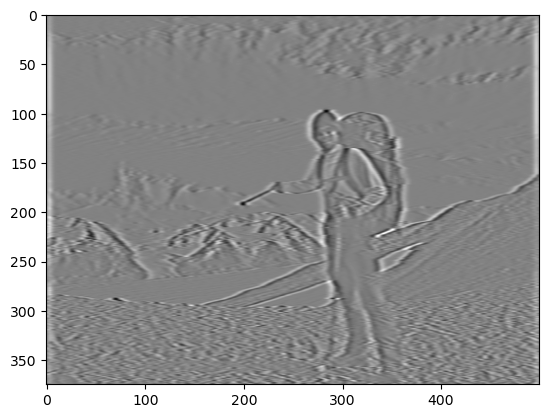

In [15]:
plt.imshow(cwt_matr[2],cmap='gray')

Text(0.5, 1.0, 'Combined Edges (Averaged)')

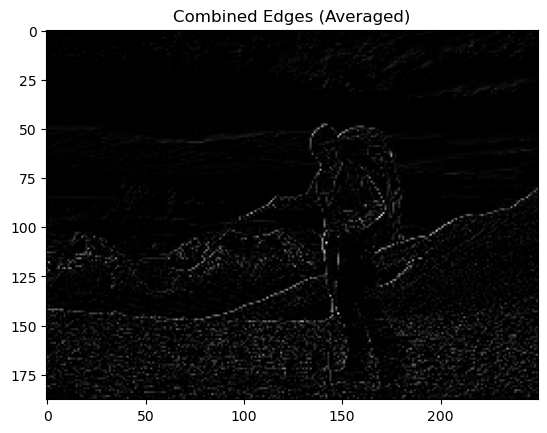

In [18]:
combined_edges_avg_H = (LH_H + HL_H + HH_H) / 3


combined_edges_avg_H = np.clip(combined_edges_avg_H, 0, 255)

plt.imshow(combined_edges_avg_H, cmap ='gray')
plt.title('Combined Edges (Averaged)')

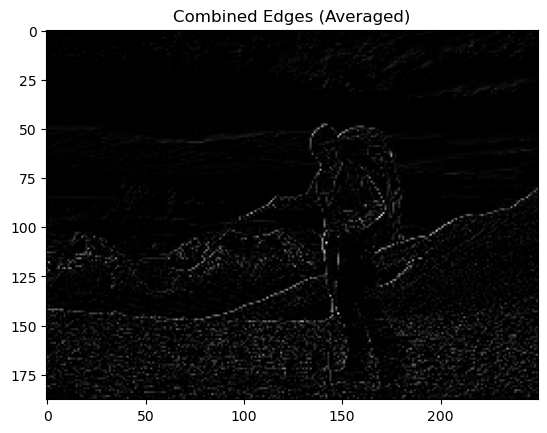

In [24]:
coeffs2 = pywt.dwt2(image, 'haar')
LL_D, (LH_D, HL_D, HH_D) = coeffs2  

combined_edges_avg_D = (LH_D + HL_D + HH_D) / 3

combined_edges_avg_D = np.clip(combined_edges_avg_D, 0, 255)

plt.imshow(combined_edges_avg_D, cmap='gray')
plt.title('Combined Edges (Averaged)')
plt.show()

Text(0.5, 1.0, 'Combined Edges (Averaged)')

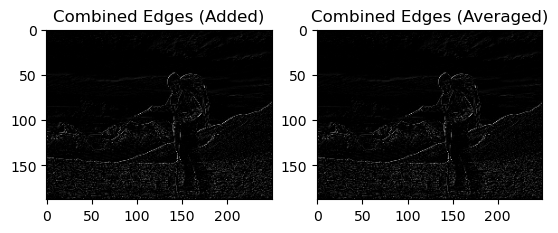

In [22]:
combined_edges_avg_H_add = (LH_H + HL_H + HH_H) 


combined_edges_avg_H_add = np.clip(combined_edges_avg_H, 0, 255)

plt.subplot(1,2,1)
plt.imshow(combined_edges_avg_H_add, cmap='gray')
plt.title('Combined Edges (Added)') 

plt.subplot(1,2,2)
plt.imshow(combined_edges_avg_H, cmap ='gray')
plt.title('Combined Edges (Averaged)') 

Text(0.5, 1.0, 'Combined Edges (Averaged)')

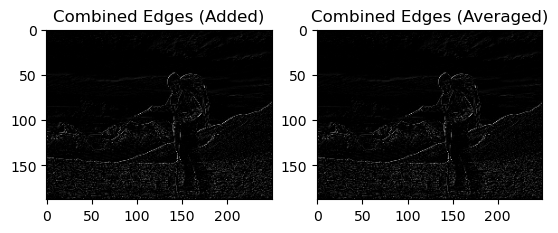

In [25]:
combined_edges_avg_D_add = (LH_D + HL_D + HH_D) 


combined_edges_avg_D_add = np.clip(combined_edges_avg_D, 0, 255)

plt.subplot(1,2,1)
plt.imshow(combined_edges_avg_D_add, cmap='gray')
plt.title('Combined Edges (Added)') 

plt.subplot(1,2,2)
plt.imshow(combined_edges_avg_D, cmap ='gray')
plt.title('Combined Edges (Averaged)') 

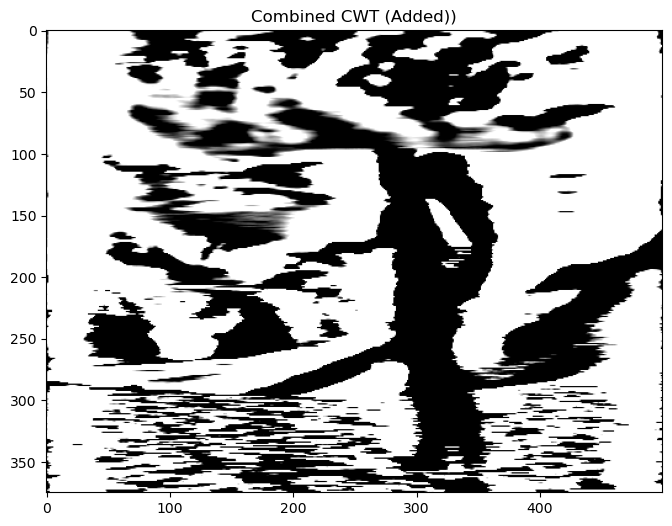

In [26]:
combined_cwt_add = np.zeros_like(cwt_matr[0])

for i in range(len(cwt_matr)):
    combined_cwt_add += cwt_matr[i]
    
combined_cwt_add = np.clip(combined_cwt_add,0,255)

plt.figure(figsize=(8,6))
plt.imshow(combined_cwt_add,cmap='gray')
plt.title('Combined CWT (Added))')
plt.show()

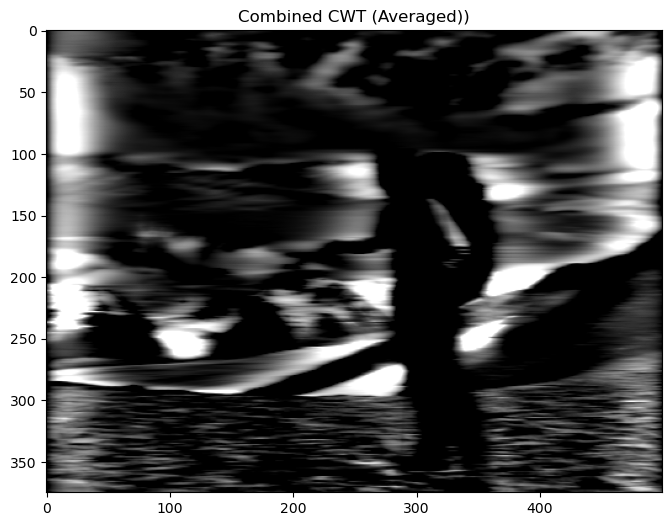

In [27]:
combined_cwt_avg = np.mean(cwt_matr, axis=0)
    
combined_cwt_avg = np.clip(combined_cwt_avg,0,255)

plt.figure(figsize=(8,6))
plt.imshow(combined_cwt_avg,cmap='gray')
plt.title('Combined CWT (Averaged))')
plt.show()

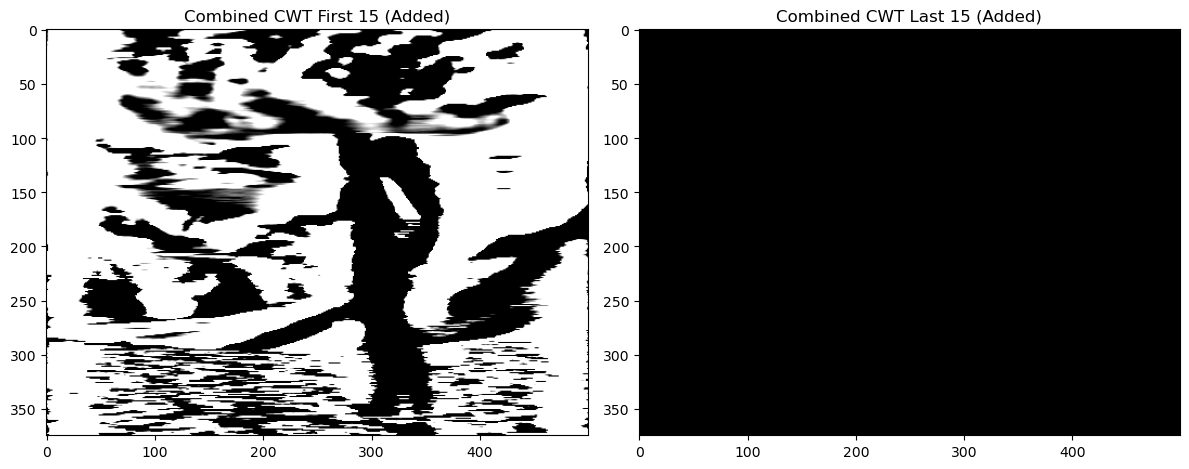

In [29]:
combined_cwt_add_first_15 = np.zeros_like(cwt_matr[0])
combined_cwt_add_last_15 = np.zeros_like(cwt_matr[0])

for i in range(15):
    combined_cwt_add_first_15 += cwt_matr[i]
    
for i in range(15,30):
    combined_cwt_add_first_15 += cwt_matr[i]
    
combined_cwt_add_first_15 = np.clip(combined_cwt_add_first_15, 0, 255)
combined_cwt_add_last_15 = np.clip(combined_cwt_add_last_15, 0, 255)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(combined_cwt_add_first_15, cmap='gray')
plt.title('Combined CWT First 15 (Added)')

plt.subplot(1,2,2)
plt.imshow(combined_cwt_add_last_15, cmap='gray')
plt.title('Combined CWT Last 15 (Added)')

plt.tight_layout()
plt.show()

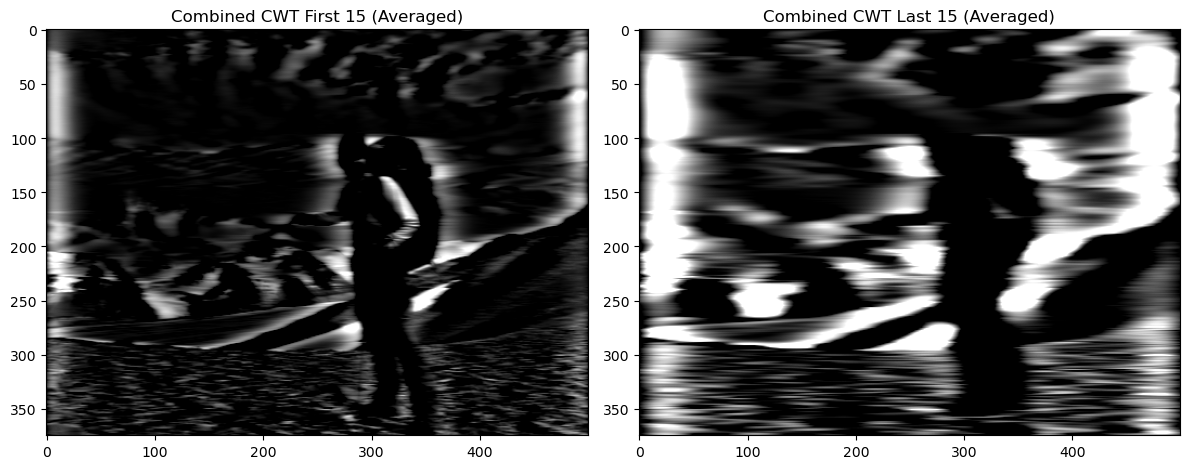

In [31]:
combined_cwt_avg_first_15 = np.mean(cwt_matr[:15], axis=0)
combined_cwt_avg_last_15 = np.mean(cwt_matr[15:], axis=0)

    
combined_cwt_avg_first_15 = np.clip(combined_cwt_avg_first_15, 0, 255)
combined_cwt_avg_last_15 = np.clip(combined_cwt_avg_last_15, 0, 255)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(combined_cwt_avg_first_15, cmap='gray')
plt.title('Combined CWT First 15 (Averaged)')

plt.subplot(1,2,2)
plt.imshow(combined_cwt_avg_last_15, cmap='gray')
plt.title('Combined CWT Last 15 (Averaged)')

plt.tight_layout()
plt.show()

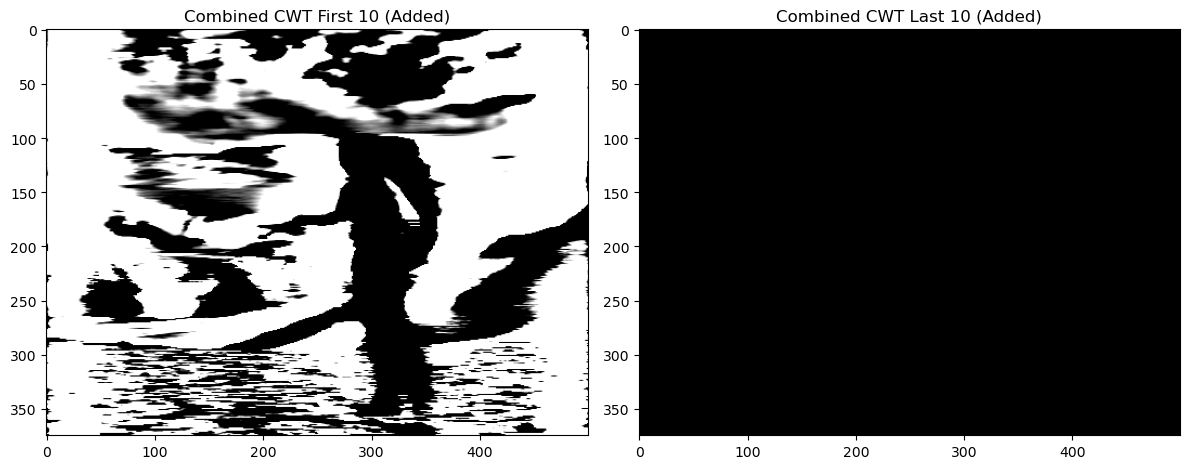

In [34]:
combined_cwt_add_first_10 = np.zeros_like(cwt_matr[0])
combined_cwt_add_last_10 = np.zeros_like(cwt_matr[0])

for i in range(10):
    combined_cwt_add_first_10 += cwt_matr[i]
    
for i in range(20,30):
    combined_cwt_add_first_10 += cwt_matr[i]
    
combined_cwt_add_first_10 = np.clip(combined_cwt_add_first_10, 0, 255)
combined_cwt_add_last_10 = np.clip(combined_cwt_add_last_10, 0, 255)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(combined_cwt_add_first_10, cmap='gray')
plt.title('Combined CWT First 10 (Added)')

plt.subplot(1,2,2)
plt.imshow(combined_cwt_add_last_10, cmap='gray')
plt.title('Combined CWT Last 10 (Added)')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Combined CWT First 5 (Added)')

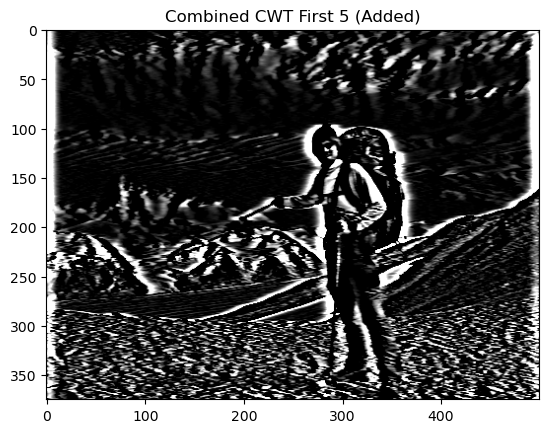

In [35]:
combined_cwt_add_first_5 = np.zeros_like(cwt_matr[0])

for i in range(5):
    combined_cwt_add_first_5 += cwt_matr[i]
    
combined_cwt_add_first_5 = np.clip(combined_cwt_add_first_5, 0, 255)

plt.imshow(combined_cwt_add_first_5, cmap='gray')
plt.title('Combined CWT First 5 (Added)')

Text(0.5, 1.0, 'Combined CWT First 5 and last 5 (Added)')

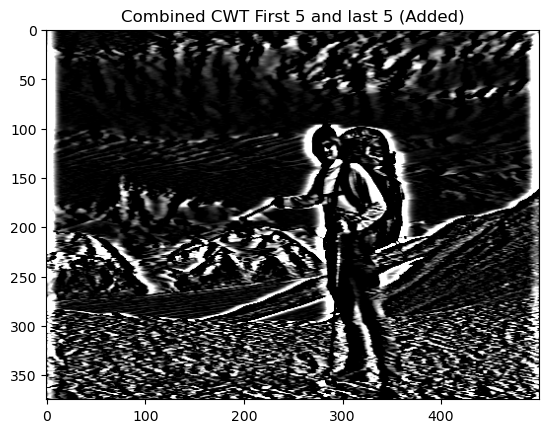

In [36]:
combined_cwt_add_first_last_5 = np.zeros_like(cwt_matr[0])

for i in range(5):
    combined_cwt_add_first_last_5 += cwt_matr[i]
    
for i in range(20,30):
    combined_cwt_add_first_5 += cwt_matr[i]
    
combined_cwt_add_first_last_5 = np.clip(combined_cwt_add_first_last_5, 0, 255)

plt.imshow(combined_cwt_add_first_last_5, cmap='gray')
plt.title('Combined CWT First 5 and last 5 (Added)')

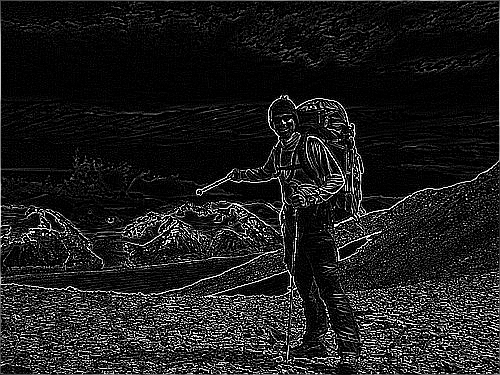

In [44]:
from PIL import Image, ImageFilter

gim = Image.open('/Users/sakshi/Desktop/img.jpg').convert('L')

laplacian = gim.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8, -1, -1, -1, -1),1,0))
laplacian

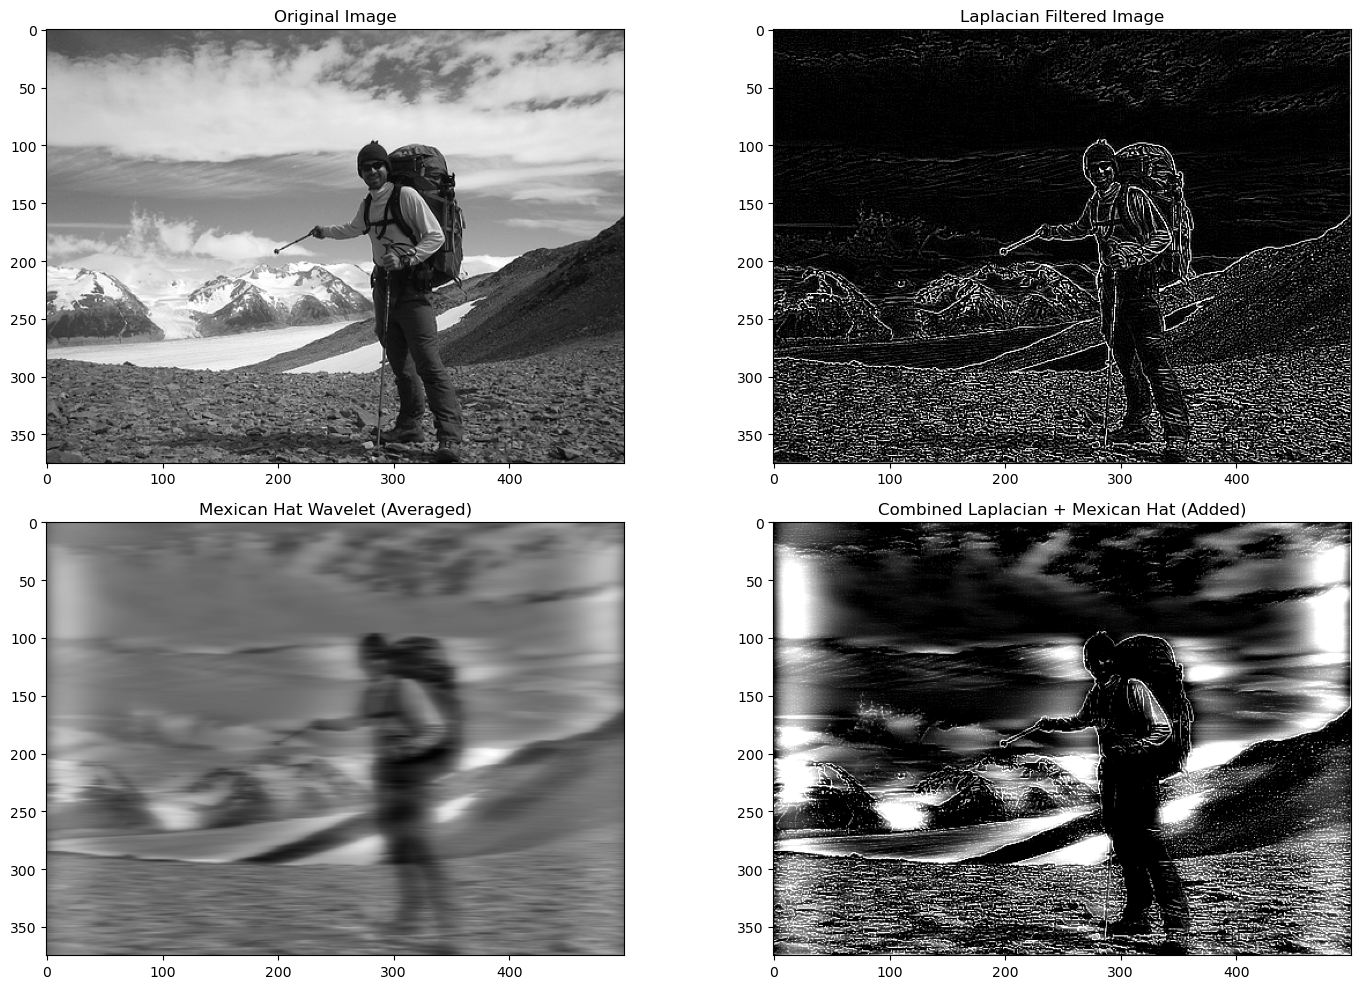

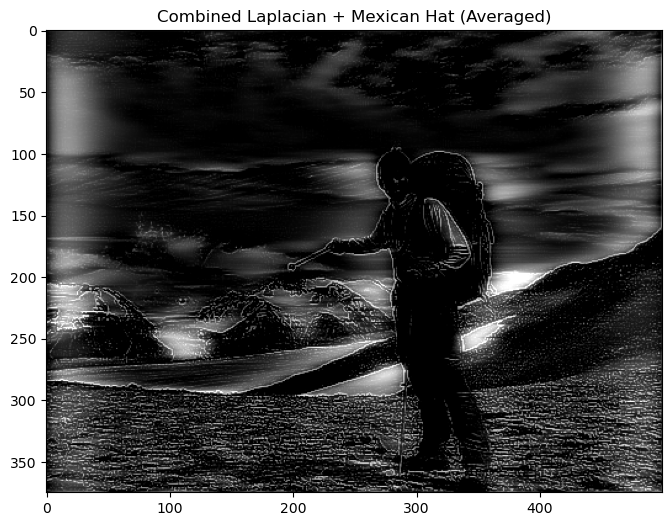

In [47]:
laplacian_filtered = gim.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8, -1, -1, -1, -1),1,0))

laplacian_array = np.array(laplacian_filtered)

widths = np.arange(1,31)
cwt_matr, freqs = pywt.cwt(image,widths,'mexh')

combined_add = laplacian_array + np.mean(cwt_matr, axis=0)
combined_add = np.clip(combined_add,0,255)

combined_avg = (laplacian_array + np.mean(cwt_matr, axis=0)) / 2
combined_avg = np.clip(combined_avg,0,255)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(laplacian_array,cmap='gray')
plt.title('Laplacian Filtered Image')

plt.subplot(2,2,3)
plt.imshow(np.mean(cwt_matr, axis=0),cmap='gray')
plt.title('Mexican Hat Wavelet (Averaged)')

plt.subplot(2,2,4)
plt.imshow(combined_add,cmap='gray')
plt.title('Combined Laplacian + Mexican Hat (Added)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
plt.imshow(combined_avg, cmap='gray')
plt.title('Combined Laplacian + Mexican Hat (Averaged)')
plt.show()

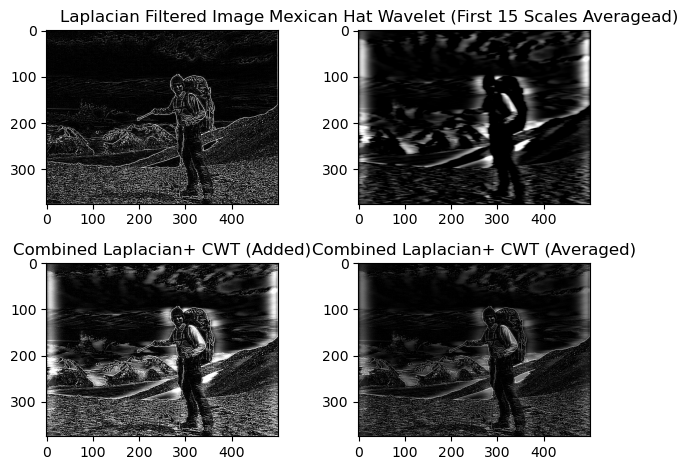

In [49]:
cwt_avg_first_15 = np.mean(cwt_matr[:15], axis=0)

cwt_avg_first_15 = np.clip(cwt_avg_first_15,0,255)

combined_add_first_15_laplacian = laplacian_array + cwt_avg_first_15
combined_add_first_15_laplacian = np.clip(combined_add_first_15_laplacian,0,255)

combined_avg_first_15_laplacian = (laplacian_array + cwt_avg_first_15) / 2
combined_avg_first_15_laplacian = np.clip(combined_avg_first_15_laplacian,0,255)

plt.subplot(2,2,1)
plt.imshow(laplacian_array,cmap='gray')
plt.title('Laplacian Filtered Image')

plt.subplot(2,2,2)
plt.imshow(cwt_avg_first_15,cmap='gray')
plt.title('Mexican Hat Wavelet (First 15 Scales Averagead)')

plt.subplot(2,2,3)
plt.imshow(combined_add_first_15_laplacian,cmap='gray')
plt.title('Combined Laplacian+ CWT (Added)')

plt.subplot(2,2,4)
plt.imshow(combined_avg_first_15_laplacian,cmap='gray')
plt.title('Combined Laplacian+ CWT (Averaged)')

plt.tight_layout()
plt.show()